# Initialize the dictionary using Gartner Hype cycle reports for 2016-2020

In [11]:
# Initialize buzzword dictionary
buzzwords = {
    '2016': [
        'Virtual Reality', 'Machine Learning', 'Blockchain', 'IoT Platform',
        '3D Printing', 'Autonomous Vehicles', 'Natural Language Processing',
        'Smart Robots', 'Wearable Technology', 'Big Data Analytics',
        'Drones', 'Predictive Analytics', 'Cognitive Computing', 'Cybersecurity',
        'Augmented Reality'
    ],
    '2017': [
        'Artificial Intelligence', 'Deep Learning', 'Edge Computing', '5G',
        'Chatbots', 'Digital Twin', 'Mixed Reality', 'Serverless Computing',
        'Voice Assistants', 'Neural Networks', 'Robotic Process Automation',
        'Biometric Authentication', 'Quantum Encryption', 'Data Lakes'
    ],
    '2018': [
        'Quantum Computing', 'Augmented Reality', 'Digital Twins', 'Serverless PaaS',
        'Blockchain in Supply Chain', 'Cyber Physical Systems', 'Emotion AI',
        'Microservices', 'Biochips', 'Smart Dust', 'Digital Ethics', 'Explainable AI',
        'Advanced Anomaly Detection', 'Spatial Computing'
    ],
    '2019': [
        'Hyperautomation', 'Multi-experience', 'Distributed Cloud', 'AI Security',
        'Human Augmentation', 'Autonomous Things', 'Privacy-enhancing Computation',
        'Decentralized Web', 'Neuromorphic Hardware', 'Digital Ecosystems',
        'Adaptive Machine Learning', 'Edge AI', 'Natural Language Generation',
        'Blockchain Scalability'
    ],
    '2020': [
        'Cybersecurity Mesh', 'AI Engineering', 'Total Experience', 'Internet of Behaviors',
        'Generative AI', 'Formative AI', 'Composable Applications', 'Digital Health',
        'Smart Fabrics', '5G Applications', 'Hyperautomation', 'Anywhere Operations',
        'Distributed Cloud', 'Intelligent Composable Business', 'Hyperconnected Networks'
    ]
}

# Combine all buzzwords into a single list
all_buzzwords = []
for year in buzzwords:
    all_buzzwords.extend(buzzwords[year])
# Remove duplicates if any
all_buzzwords = list(set(all_buzzwords))

# Generate similar phrases using BERT

In [12]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.metrics.pairwise import cosine_similarity

local_directory = r'C:\Users\Taher\Job Assignments\Practise\Trading\Buzzwords'

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained(local_directory)

# Load pre-trained model (weights), setting weights_only=True
model = BertModel.from_pretrained(local_directory)

# Function to get embeddings
def get_embedding(text):
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs)
    # Get the embeddings for the [CLS] token
    embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()
    return embeddings

# Assume all_buzzwords is already defined as a list of buzzwords
# Generate embeddings for buzzwords
buzzword_embeddings = {}
for buzzword in all_buzzwords:
    buzzword_embeddings[buzzword] = get_embedding(buzzword)

# Generate More phrases using synonyms

In [13]:
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')

# Function to get synonyms
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word.replace(' ', '_')):
        for lemma in syn.lemmas():
            synonym = lemma.name().replace('_', ' ')
            if synonym != word:
                synonyms.add(synonym)
    return synonyms

# Expand buzzwords with synonyms
expanded_buzzwords = set(all_buzzwords)
for buzzword in all_buzzwords:
    synonyms = get_synonyms(buzzword)
    expanded_buzzwords.update(synonyms)

# Convert set to list
expanded_buzzwords = list(expanded_buzzwords)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Taher\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Search for buzzwords in Earnings Call Transcripts

In [14]:
import pandas as pd
import re
import os

# Define the directory containing the transcript text files
transcripts_directory = r'C:\Users\Taher\Job Assignments\Practise\Trading\earnings-call-transcripts-dataset-main\Transcripts'  # Replace with your directory path

# List to hold transcript data
transcripts_data = []

# Loop through all files in the directory
for filename in os.listdir(transcripts_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(transcripts_directory, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            transcript_text = file.read()
            # Extract metadata from filename or text if available
            # Adjust this part according to your actual filename format
            # For example, filename: 'Apple_2023-01-31.txt'
            name_parts = filename.replace('.txt', '').split('_')
            company = name_parts[0]
            date = name_parts[1] if len(name_parts) > 1 else None
            # Append data to the list
            transcripts_data.append({
                'company': company,
                'date': date,
                'transcript_text': transcript_text
            })

# Create DataFrame
transcripts_df = pd.DataFrame(transcripts_data)

# Function to count buzzword frequency
def count_buzzwords(text, buzzwords_list):
    text = text.lower()
    buzzword_count = 0
    for buzzword in buzzwords_list:
        # Create regex pattern to match whole words
        pattern = r'\b' + re.escape(buzzword.lower()) + r'\b'
        matches = re.findall(pattern, text)
        buzzword_count += len(matches)
    return buzzword_count

# Calculate Buzzlevel

In [15]:

# Function to count total words
def count_total_words(text):
    words = text.split()
    return len(words)

# Apply functions to DataFrame
transcripts_df['buzzword_count'] = transcripts_df['transcript_text'].apply(
    lambda x: count_buzzwords(x, expanded_buzzwords)
)

transcripts_df['total_words'] = transcripts_df['transcript_text'].apply(count_total_words)

# Calculate Buzzlevel
transcripts_df['Buzzlevel'] = transcripts_df['buzzword_count'] / transcripts_df['total_words']

# View the results
print(transcripts_df[['company', 'date', 'buzzword_count', 'total_words', 'Buzzlevel']])

               company  date  buzzword_count  total_words  Buzzlevel
0     2016-Apr-19-INTC  None              10        10451   0.000957
1     2016-Apr-20-ASML  None               0        10117   0.000000
2      2016-Apr-21-AMD  None               0         9264   0.000000
3    2016-Apr-21-GOOGL  None              22         9940   0.002213
4     2016-Apr-21-MSFT  None               3        10061   0.000298
..                 ...   ...             ...          ...        ...
183  2020-Jul-30-GOOGL  None               6         8579   0.000699
184     2020-Jun-29-MU  None              19         9859   0.001927
185     2020-Mar-25-MU  None               7         9855   0.000710
186   2020-May-13-CSCO  None               5         9760   0.000512
187   2020-May-21-NVDA  None             114        14297   0.007974

[188 rows x 5 columns]


# Fetch stock price data around earnings call date

In [16]:
import pandas as pd
import re
import yfinance as yf
from datetime import timedelta

# Assuming transcripts_df is your DataFrame

# Step 1: Extract date and ticker from 'company' column
def extract_date_ticker(company_str):
    parts = company_str.split('-')
    if len(parts) >= 4:
        year = parts[0]
        month = parts[1]
        day = parts[2]
        ticker = parts[3]
        date_str = f"{year}-{month}-{day}"
        return date_str, ticker
    else:
        return None, None

transcripts_df['date_str'], transcripts_df['ticker'] = zip(*transcripts_df['company'].apply(extract_date_ticker))

# Step 2: Convert 'date_str' to datetime
transcripts_df['date'] = pd.to_datetime(transcripts_df['date_str'], format='%Y-%b-%d', errors='coerce')

# Step 3: Fetch stock data
def get_stock_performance(ticker, date):
    if pd.isnull(date) or pd.isnull(ticker):
        return None, None, None

    stock = yf.Ticker(ticker)
    # Define the date range
    start_date = date - timedelta(days=2)
    end_date = date + timedelta(days=2)
    hist = stock.history(start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

    # Ensure the date index is of type datetime
    hist.index = pd.to_datetime(hist.index)

    # Get prices for -1, 0, +1 days relative to earnings call date
    price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
    price_0 = hist['Close'].get(date, None)
    price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)

    return price_minus_1, price_0, price_plus_1

def apply_stock_performance(row):
    ticker = row['ticker']
    date = row['date']
    price_minus_1, price_0, price_plus_1 = get_stock_performance(ticker, date)
    return pd.Series({
        'price_minus_1': price_minus_1,
        'price_0': price_0,
        'price_plus_1': price_plus_1
    })

stock_performance = transcripts_df.apply(apply_stock_performance, axis=1)
transcripts_df = pd.concat([transcripts_df, stock_performance], axis=1)

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_minus_1 = hist['Close'].get(date - timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:42: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_0 = hist['Close'].get(date, None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:43: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  price_plus_1 = hist['Close'].get(date + timedelta(days=1), None)
C:\Users\Taher\AppData\Local\Temp\ipykernel_30176\477465287.py:41: FutureWar

# Analyze relationship between buzzlevel and stock performance

Correlation between Buzzlevel and stock price change: 0.08431058024505808


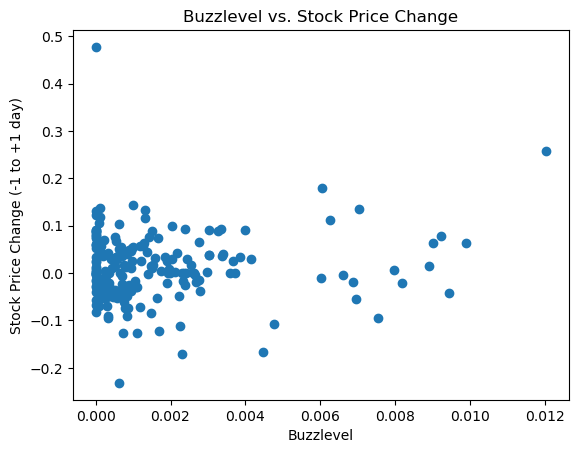

In [17]:
# Calculate stock price changes
transcripts_df['price_change'] = (transcripts_df['price_plus_1'] - transcripts_df['price_minus_1']) / transcripts_df['price_minus_1']

# Handle missing values in price_change
transcripts_df['price_change'] = transcripts_df['price_change'].fillna(0)

# Handle missing values
transcripts_df.dropna(subset=['Buzzlevel', 'price_change'], inplace=True)

# Analyze the correlation
correlation = transcripts_df['Buzzlevel'].corr(transcripts_df['price_change'])
print(f"Correlation between Buzzlevel and stock price change: {correlation}")

# Plotting
import matplotlib.pyplot as plt

plt.scatter(transcripts_df['Buzzlevel'], transcripts_df['price_change'])
plt.xlabel('Buzzlevel')
plt.ylabel('Stock Price Change (-1 to +1 day)')
plt.title('Buzzlevel vs. Stock Price Change')
plt.show()